# Quantum Teleportation Exploration

In this notebook we will attempt to go into the details of the **Quantum Teleportation**.  
Just recently physicists achieved the first-ever quantum teleportation between computer chips [2].   
The heart of the quantum teleportation is quantum entanglement phenomenon [1].  
An entangled system is one whose quantum state cannot be written as a product of states of its local constituents. In other words, constituents are not parts but are inseparable whole. One constituent cannot be fully described without considering the other(s).   
As the notebook will show, the state of the entangled system is expressed as a superposition (sum) of products of states of local constituents and this sum has necessarily more than one term.  
The notebook will also show a necessity of working out related math to understand respective histograms of the results.  
After a short description of the quantum teleportation circuit we examine first 𝜙>=|0> and 𝜙>=|1> cases   
before we attempt a general |𝜙>=𝛼|0> + 𝛽|1> case. Two examples are provided to illustrate and better understand the general case.  
We finish the notebook with some modifications of the quantum teleportation circuit.

[1] https://en.wikipedia.org/wiki/Quantum_entanglement

[2] https://www.nature.com/articles/s41567-019-0727-x

## Table of contents
1) [Quantum Teleportation](#basics)  

2) [|𝜙>=|0> case](#case1)

3) [|𝜙>=|1> case](#case2)

4) [general |𝜙>=𝛼|0> + 𝛽|1> case](#case3)

5) [case |${\phi}$>=q[0] = ${1}/{\sqrt{2}}$(|0>+|1>)](#case4)

6) [case |${\phi}$>=q[0] = ${1}/{\sqrt{8}}$|0>+ ${\sqrt{7/8}}$|1>](#case5)

7) [What will happen when we apply H gates on q0 and q2 as well, in addition to q1?](#q1)

8) [What happens if we add a swap gate to the circuit in 7) between q0 and q1 after the last H gate?](#q2)

### Import needed libraries...

In [1]:
%matplotlib inline
from qiskit import QuantumRegister, ClassicalRegister
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

## Quantum Teleportation <a name='basics'></a>

Quantum teleportation circuit allows us to transmit information in a way that is not possible in the classical regime. It does not teleport any physical object. Instead, it does transmit the state of a qubit over any distance in a way that is completely secure. The protocol was developed in 1993 by Bennet and Brassard et al. [3].  

Suppose one observer, whom we shall call "Alice, " has been given a quantum system such as a photon or spin-1/2 particle, prepared in a state |${\phi}$> unknown to her, and she wishes to communicate to another observer, "Bob," sufficient information about the quantum system for him to make an accurate copy of it. An essential feature of quantum information is that it can be swapped from one system to another, but it cannot be duplicated or "cloned". It is quite unlike classical information, which can be duplicated at will.  

Alice can divide the full information encoded in |${\phi}$> into two parts, one purely classical and the other purely nonclassical, and send them to Bob through two different channels. Having received these two transmissions, Bob can construct an accurate replica of |${\phi}$>. Alice's original |${\phi}$> is destroyed in the process, as it must be to obey the no-cloning theorem. Teleporation cannot take place instantaneously or over a spacelike interval (meaning that two events are separated by more space than time), because it requires, among other things, sending a classical message from Alice to Bob. The net result is the removal of |${\phi}$> from Alice's hands and its appearance in Bob's hands a suitable time later. The remarkable feature is that the information in |${\phi}$> has been cleanly separated into classical and nonclassical parts.

[3] https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.70.1895

Let's show how to teleport the quantum state |${\phi}$> of a spin-1/2 particle. The nonclassical information is transmitted first. It comes from this part of the teleportation circuit:

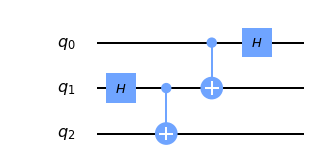

In [2]:
## Define a 3-qubit quantum circuit
q = QuantumRegister(3, 'q')

circuit = QuantumCircuit(q)
## Apply the quantum gates
circuit.h(q[1])           #Hadammard on q[1]
circuit.cx(q[1], q[2])    #CNOT on q[1] and q[2]
circuit.cx(q[0], q[1])    #CNOT on q[0] and q[1]
circuit.h(q[0])           #Hadammard on q[0]

## Draw the circuit
%matplotlib inline
circuit.draw(output="mpl")

## |𝜙>=|0> case <a name='case1'></a>

To simplify things we assume that |${\phi}$>=q[0]=|0>.  
Let's see what this part of the teleportation circuit does. Both q1 and q2 qubits are in the default |0> state initialization leading to |000> state as the initial state of these 3 qubits. The first Haddamard gate acts on the q1 qubit changing its state to ${1}/{\sqrt{2}}$(|0>+|1>) so the overall state of 3 qubits at this point is ${1}/{\sqrt{2}}$(|000>+|010>). Now comes the first CNOT gate between q1 and q2 which changes the overall state of 3 qubits to ${1}/{\sqrt{2}}$(|000>+|011>). The second CNOT gate between q0 and q1 does nothing since q0 is the control bit and in the state |0>. The state of 3 qubits after the second CNOT gate is unchanged. The last Haddamard gate acts on q0 changing its state to ${1}/{\sqrt{2}}$(|0>+|1>) so that the final state of 3 qubits becomes  
${1}/{\sqrt{2}}$(${1}/{\sqrt{2}}$(|0>+|1>)|00>+${1}/{\sqrt{2}}$(|0>+|1>)|11>)=${1}/{2}$(|000>+|100>+|011>+|111>).  
As we can see there is 1/4 probability these 3 qubits will end in any of the above 4 states if we perform measurements.  
Let's add now measurements to the above circuit and verify this probability value.

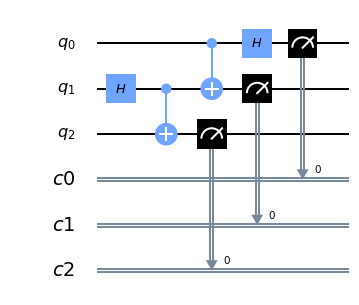

In [3]:
## Define a 3-qubit quantum circuit
q = QuantumRegister(3, 'q')
## We need 3 classical registers for measurements
c = [ClassicalRegister(1) for _ in range(3)]
circuit = QuantumCircuit(q)
for register in c:
    circuit.add_register(register)
    
## Apply the quantum gates
circuit.h(q[1])           #Hadammard on q[1]
circuit.cx(q[1], q[2])    #CNOT on q[1] and q[2]
circuit.cx(q[0], q[1])    #CNOT on q[0] and q[1]
circuit.h(q[0])           #Hadammard on q[0]

## Finish off with the measurements
circuit.measure(q[0], c[0])
circuit.measure(q[1], c[1])
circuit.measure(q[2], c[2])

## Draw the circuit
%matplotlib inline
circuit.draw(output="mpl")

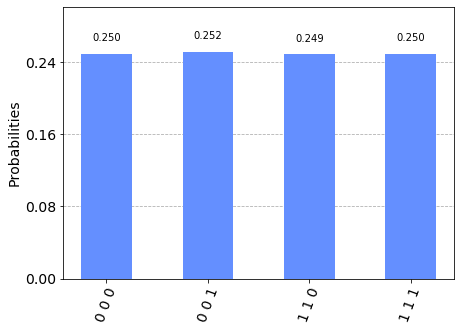

In [6]:
## Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend=simulator, shots=20480)
result = job.result()

## Plot a histogram of the results
counts = result.get_counts(circuit)
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

As expected, the probabilites are well in agreement with 1/4 theoretical value. But to get to this nice result we had to perform 20480 shots.  
Let's look now at the classical information which comes from the measurements on the qubits q0 and q1 and as it can be seen from the above bar graph there are 4 possible outcomes in the form of 2 classical bits (00, 10, 01, 11) with the same 1/4 probability.  
Bob will receive these 2 classical bits and the q2 qubit. With these 2 pieces of information Bob can construct an accurate replica of |${\phi}$> as follows:  
Bob receives 00 classical bits and q2 in the state |0>: he does nothing (remember |${\phi}$>=|0>).   
Bob receives 10 classical bits and q2 in the state |0>: he applies Z gate on q2 to get |0> state, since Z|0>=|0>.  
Bob recevies 01 classical bits and q2 in the state |1>: he applies X gate on q2 to get |0> state, since X|1>=|0>.  
Bob receives 11 classical bits and q2 in the state |1>: he applies first X gate on q2 and then Z gate to get ZX|1>=Z|0>=|0> state. So we see in all 4 cases Bob is able to generate an accurate replica of |${\phi}$>. We also notice that the application of Z or X gate happens when respective classical bit is 1.  
The entire teleportation circuit that implements what is said above is displayed below, enriched with an additional measurement on the qubit q2 so we can explicitly see that the state of this qubit is always |0>.  
2 c_if functions are used to implement conditional applications of Z or X gates when respective classical bit is 1. These functions essentially simulate "Bob".

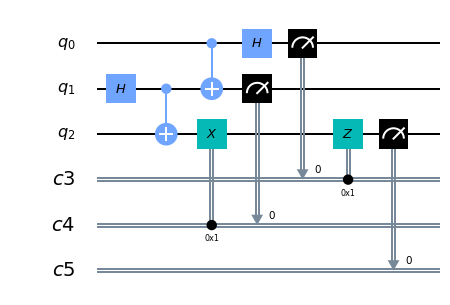

In [7]:
## We need 3 quantum registers
q = QuantumRegister(3, 'q')
## We need also 3 classical registers
c = [ClassicalRegister(1) for _ in range(3)]
## Define a 3-qubit quantum circuit
circuit = QuantumCircuit(q)
## Add classical registers to the circuit
for register in c:
    circuit.add_register(register)

## Apply the quantum gates
circuit.h(q[1])           #Hadammard on q[1]
circuit.cx(q[1], q[2])    #CNOT on q[1] and q[2]
circuit.cx(q[0], q[1])    #CNOT on q[0] and q[1]
circuit.h(q[0])           #Hadammard on q[0]

## Finish off with the measurements
circuit.measure(q[1], c[1])
## Apply X gate on q[2] depending on the value of the classical register c[1]
circuit.x(q[2]).c_if(c[1], 1)
circuit.measure(q[0], c[0])
## Apply Z gate on q[2] depending on the value of the classical register c[0]
circuit.z(q[2]).c_if(c[0], 1)
## measure q[2]
circuit.measure(q[2], c[2])

## Draw the circuit
%matplotlib inline
circuit.draw(output="mpl")

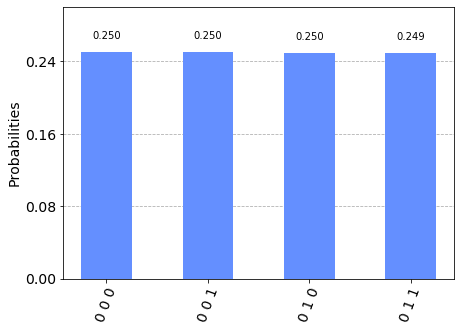

In [8]:
## Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend=simulator, shots=204800)
result = job.result()

## Plot a histogram of the results
counts = result.get_counts(circuit)
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

As expected after the measurements we see that q2 qubit is always in |0> state (the third row of zeros). The state of q0 is destroyed as it became a classical bit with the value of 0 or 1 (the first row).

## |𝜙>=|1> case <a name='case2'></a>

Let's assume now that |${\phi}$>=q[0]=|1>. To initialize q0 qubit to |1> state we need to apply X (NOT) gate to q0. Respective teleportation circuit is displayed below.

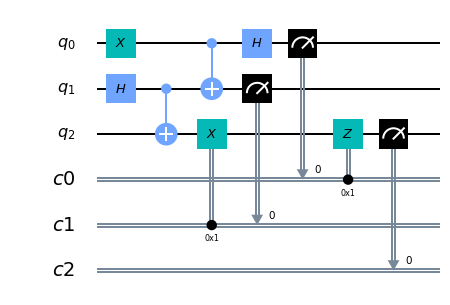

In [3]:
### We need 3 quantum registers
q = QuantumRegister(3, 'q')
## We need also 3 classical registers
c = [ClassicalRegister(1) for _ in range(3)]
## Define a 3-qubit quantum circuit
circuit = QuantumCircuit(q)
## Add classical registers to the circuit
for register in c:
    circuit.add_register(register)

## Apply the quantum gates
circuit.x(q[0])           #X gate on q[0] to get |1> state
circuit.h(q[1])           #Hadammard on q[1]
circuit.cx(q[1], q[2])    #CNOT on q[1] and q[2]
circuit.cx(q[0], q[1])    #CNOT on q[0] and q[1]
circuit.h(q[0])           #Hadammard on q[0]

## Finish off with the measurements
circuit.measure(q[1], c[1])
## Apply X gate on q[2] depending on the value of the classical register c[1]
circuit.x(q[2]).c_if(c[1], 1)
circuit.measure(q[0], c[0])
## Apply Z gate on q[2] depending on the value of the classical register c[0]
circuit.z(q[2]).c_if(c[0], 1)
## measure q[2]
circuit.measure(q[2], c[2])

## Draw the circuit
%matplotlib inline
circuit.draw(output="mpl")

The initial state of 3 qubits is |100>. H on q1 changes its state to ${1}/{\sqrt{2}}$(|0>+|1>) so the overall state of 3 qubits becomes ${1}/{\sqrt{2}}$(|100>+|110>). As before, now comes the first CNOT gate between q1 and q2 which changes the overall state of 3 qubits to ${1}/{\sqrt{2}}$(|100>+|111>). After the second CNOT the overall state is ${1}/{\sqrt{2}}$(|110>+|101>). And after the last H gate the final state is  
${1}/{\sqrt{2}}$(${1}/{\sqrt{2}}$(|0>-|1>)|10>+${1}/{\sqrt{2}}$(|0>-|1>)|01>)=${1}/{2}$(|010>-|110>+|001>-|101>).  
Again, there is 1/4 probability 3 qubits will end in any of the above 4 states when we perform measurements.

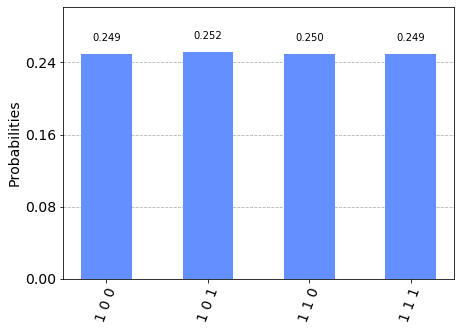

In [4]:
## Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend=simulator, shots=204800)
result = job.result()

## Plot a histogram of the results
counts = result.get_counts(circuit)
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

As before Bob will receive 2 classical bits and the q2 qubit. With these 2 pieces of information Bob can construct an accurate replica of |${\phi}$> as follows:  
Bob receives 00 classical bits and q2 in the state |1>: he does nothing (remember |${\phi}$>=|1>).   
Bob receives 10 classical bits and q2 in the state -|1>: he applies Z gate on q2 to get |1> state, since -Z|1>=|1>.  
Bob recevies 01 classical bits and q2 in the state |0>: he applies X gate on q2 to get |1> state, since X|0>=|1>.  
Bob receives 11 classical bits and q2 in the state -|0>: he applies first X gate on q2 and then Z gate to get -ZX|0>=-Z|1>=|1> state.  
We see in all 4 cases Bob is able to generate an accurate replica of |${\phi}$>.  
As the above bar graph shows after the measurements q2 qubit is always in |1> state (the third row of ones) and the probabilites are well in agreement with 1/4 theoretical value.

## general |${\phi}$>=${\alpha}$|0> + ${\beta}$|1> case <a name='case3'></a>

Let's first work out the math for this general case.  
The initial state of 3 qubits is |${\phi}$>|00>=(${\alpha}$|0>+${\beta}$|1>)|00>=${\alpha}$|000>+${\beta}$|100>.  
|${\phi}$> is a normalized state so |${\alpha}$|$^{2}$+|${\beta}$|$^{2}$=1.  
After the first H gate that acts on q1, the state of 3 qubits becomes  
${\alpha}$|0>${1}/{\sqrt{2}}$(|0>+|1>)|0>+${\beta}$|1>${1}/{\sqrt{2}}$(|0>+|1>)|0>=${\alpha}/{\sqrt{2}}$(|000>+|010>)+${\beta}/{\sqrt{2}}$(|100>+|110>).  
The first CNOT where q1 is the control qubit changes the state of 3 qubits to ${\alpha}/{\sqrt{2}}$(|000>+|011>)+${\beta}/{\sqrt{2}}$(|100>+|111>).  
After the second CNOT where q0 is the control qubit the state becomes ${\alpha}/{\sqrt{2}}$(|000>+|011>)+${\beta}/{\sqrt{2}}$(|110>+|101>).  
The second H gate that acts on q0 qubit changes the overall state of 3 qubits to  
${\alpha}/{\sqrt{2}}$[${1}/{\sqrt{2}}$(|0>+|1>)|00>+${1}/{\sqrt{2}}$(|0>+|1>)|11>]+${\beta}/{\sqrt{2}}$[${1}/{\sqrt{2}}$(|0>-|1>)|10>+${1}/{\sqrt{2}}$(|0>-|1>)|01>].  
If we simplify this expression the final state of 3 qubits before the measurements is  
${\alpha}$/2(|000>+|100>+|011>+|111>)+${\beta}$/2(|010>-|110>+|001>-|101>).  
After the measurements, Bob will receive 2 classical bits and the q2 qubit.  
With these 2 pieces of information Bob can construct an accurate replica of |𝜙> as follows:  

Bob receives 00 classical bits and q2 in the state ${\alpha}$|0> + ${\beta}$|1>: he does nothing since q2 is in the state |${\phi}$>.  

Bob receives 01 classical bits and q2 in the state ${\alpha}$|1> + ${\beta}$|0>:  
he applies X gate to q2 resulting in ${\alpha}$X|1> + ${\beta}$X|0>=${\alpha}$|0> + ${\beta}$|1>=|${\phi}$>.  

Bob receives 10 classical bits and q2 in the state ${\alpha}$|0> - ${\beta}$|1>:  
he applies Z gate to q2 resulting in ${\alpha}$Z|0> - ${\beta}$Z|1>=${\alpha}$|0> + ${\beta}$|1>=|${\phi}$> since Z|1>=-|1>.  

Bob recevies 11 classical bits and q2 in the state ${\alpha}$|1> - ${\beta}$|0>:  
he applies ZX gate to q2 resutling in ${\alpha}$ZX|1> - ${\beta}$ZX|0>=${\alpha}$Z|0> - ${\beta}$Z|1>=${\alpha}$|0> + ${\beta}$|1>=|${\phi}$>.  

We see in this general case Bob is always able to generate an accurate replica of |𝜙>. 

As expected, for ${\alpha}$=1 and ${\beta}$=0 the final state 1/2(|000>+|100>+|011>+|111>) is identical 
with |${\phi}$>=|0> case.   
For ${\alpha}$=0 and ${\beta}$=1 the final state 1/2(|010>-|110>+|001>-|101>) is identical with |${\phi}$>=|1> case.  
To become more familiar with the general case, let's look now at 2 examples for |${\phi}$>.

### case |${\phi}$>=q[0] = ${1}/{\sqrt{2}}$(|0>+|1>) <a name='case4'></a>  
Both ${\alpha}$ and ${\beta}$ are 1/${\sqrt{2}}$ which means that the final state of 3 qubits before the measurements is  
1/2$^{3/2}$(|000>+|100>+|011>+|111>+|010>-|110>+|001>-|101>).  
There is 1/8 probability 3 qubits will end in any of these 8 states after the measurements.  
Respective quantum teleportation circuit is displayed below.  
|${\phi}$> state is generated as H|0>=${1}/{\sqrt{2}}$(|0>+|1>).

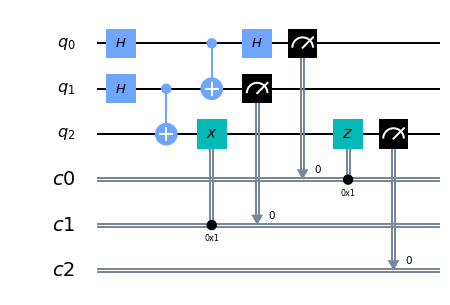

In [2]:
## We need 3 quantum registers
q = QuantumRegister(3, 'q')
## We need also 3 classical registers
c = [ClassicalRegister(1) for _ in range(3)]
## Define a 3-qubit quantum circuit
circuit = QuantumCircuit(q)
## Add classical registers to the circuit
for register in c:
    circuit.add_register(register)

## Apply the quantum gates
circuit.h(q[0])           #Hadammard on q[0] to get 1/sqrt(2)(|0>+|1>) state
circuit.h(q[1])           #Hadammard on q[1]
circuit.cx(q[1], q[2])    #CNOT on q[1] and q[2]
circuit.cx(q[0], q[1])    #CNOT on q[0] and q[1]
circuit.h(q[0])           #Hadammard on q[0]

## Finish off with the measurements
circuit.measure(q[1], c[1])
## Apply X gate on q[2] depending on the value of the classical register c[1]
circuit.x(q[2]).c_if(c[1], 1)
circuit.measure(q[0], c[0])
## Apply Z gate on q[2] depending on the value of the classical register c[0]
circuit.z(q[2]).c_if(c[0], 1)
## measure q[2]
circuit.measure(q[2], c[2])

## Draw the circuit
%matplotlib inline
circuit.draw(output="mpl")

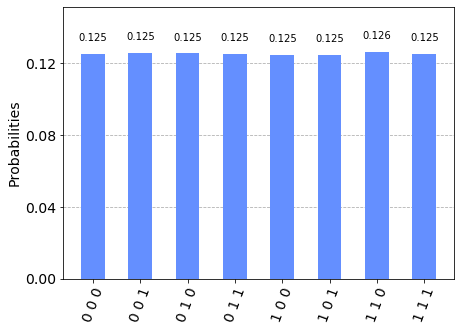

In [3]:
## Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend=simulator, shots=409600)
result = job.result()

## Plot a histogram of the results
counts = result.get_counts(circuit)
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

As expected the above bar graph shows q2 qubit in an equal superposition of |0> and |1> states after the conditional application of Z or X gates. This is hinted by the third row of 4 zeros and 4 ones and the same probabilities for all 8 bars, well in agreement with 1/8 theoretical value. The state of q2 is ${1}/{\sqrt{2}}$(|0>+|1>)state.

### case |${\phi}$>=q[0] = ${1}/{\sqrt{8}}$|0>+ ${\sqrt{7/8}}$|1>  <a name='case5'></a>
In this case ${\alpha}={1}/{\sqrt{8}}$ and ${\beta}={\sqrt{7/8}}$.   
As we did derive above for the general case of |${\phi}$>, the final state of 3 qubits before the measurements is
𝛼/2(|000>+|100>+|011>+|111>)+𝛽/2(|010>-|110>+|001>-|101>).  
If we substitute values for ${\alpha}$ and ${\beta}$ into this expression we obtain for the final state ${1}/2{\sqrt{8}}$(|000>+|100>+|011>+|111>)+${1}/2{\sqrt{7/8}}$(|010>-|110>+|001>-|101>). If we perform the measurements there is 1/32 probability that 3 qubits will end in any of these states:|000>, |100>, |011> or |111> or 7/32 probability that they will end in any of these states: |010>, |110>, |001> or |101>. Of course, the total probability is 1 since 4 x 1/32 + 4 x 7/32=1.  
Let's verify these probabilities by building respective quantum circuit.  
If we apply $R_y(\theta)$ gate (rotation around Y-axis) to |0> state we can build |${\phi}$> state since
$$
R_y(\theta)|0> =
\begin{pmatrix}
\cos(\theta/2) & - \sin(\theta/2)\\
\sin(\theta/2) & \cos(\theta/2).
\end{pmatrix}
\begin{pmatrix}
1\\
0
\end{pmatrix}=\cos(\theta/2)|0>+\sin(\theta/2)|1>.
$$  
which means that ${\alpha}=\cos(\theta/2)$ and ${\beta}=\sin(\theta/2)$ and it is easy to see that ${\theta}$ = 2.41885838 radians.   
Respective quantum circuit is displayed below along with the measurements.

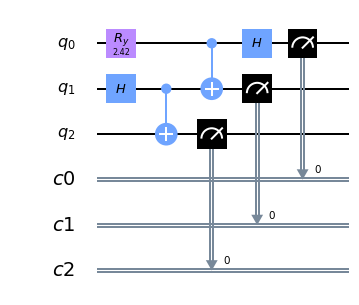

In [2]:
## We need 3 quantum registers
q = QuantumRegister(3, 'q')
## We need also 3 classical registers
c = [ClassicalRegister(1) for _ in range(3)]
## Define a 3-qubit quantum circuit
circuit = QuantumCircuit(q)
## Add classical registers to the circuit
for register in c:
    circuit.add_register(register)

## Apply the quantum gates
theta = 2.41885838           #define rotational angle in radians
circuit.ry(theta, q[0])      #rotation around y axis on q[0] for theta rad
circuit.h(q[1])              #Hadammard on q[1]
circuit.cx(q[1], q[2])       #CNOT on q[1] and q[2]
circuit.cx(q[0], q[1])       #CNOT on q[0] and q[1]
circuit.h(q[0])              #Hadammard on q[0]

## Finish off with the measurements
circuit.measure(q[0], c[0])
circuit.measure(q[1], c[1])
circuit.measure(q[2], c[2])

## Draw the circuit
%matplotlib inline
circuit.draw(output="mpl")

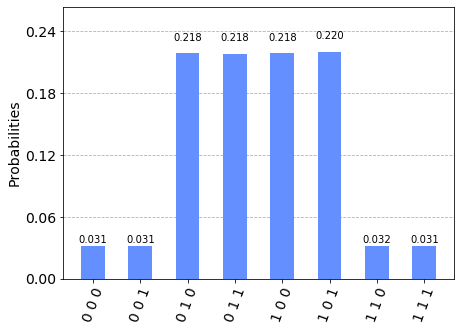

In [3]:
## Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend=simulator, shots=409600)
result = job.result()

## Plot a histogram of the results
counts = result.get_counts(circuit)
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

The above bar graph confirms probabilities. Since 1/32 = 0.03125 and 7/32=0.21875 we see that,  
as expected, after the measurements there is 1/32 probability that 3 qubits will end in any of these states:  
|000>, |100>, |011> or |111> or 7/32 probability that they will end in any of these states: |010>, |110>, |001> or |101>.  

The full quantum teleportation circuit for this case with respective probabilities is displayed below.

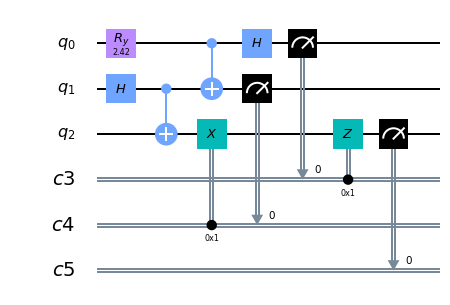

In [4]:
## We need 3 quantum registers
q = QuantumRegister(3, 'q')
## We need also 3 classical registers
c = [ClassicalRegister(1) for _ in range(3)]
## Define a 3-qubit quantum circuit
circuit = QuantumCircuit(q)
## Add classical registers to the circuit
for register in c:
    circuit.add_register(register)

## Apply the quantum gates
theta = 2.41885838           #define rotational angle in radians
circuit.ry(theta, q[0])      #rotation around y axis on q[0] for theta rad
circuit.h(q[1])              #Hadammard on q[1]
circuit.cx(q[1], q[2])       #CNOT on q[1] and q[2]
circuit.cx(q[0], q[1])       #CNOT on q[0] and q[1]
circuit.h(q[0])              #Hadammard on q[0]

## Finish off with the measurements
circuit.measure(q[1], c[1])
## Apply X gate on q[2] depending on the value of the classical register c[1]
circuit.x(q[2]).c_if(c[1], 1)
circuit.measure(q[0], c[0])
## Apply Z gate on q[2] depending on the value of the classical register c[0]
circuit.z(q[2]).c_if(c[0], 1)
## measure q[2]
circuit.measure(q[2], c[2])

## Draw the circuit
%matplotlib inline
circuit.draw(output="mpl")

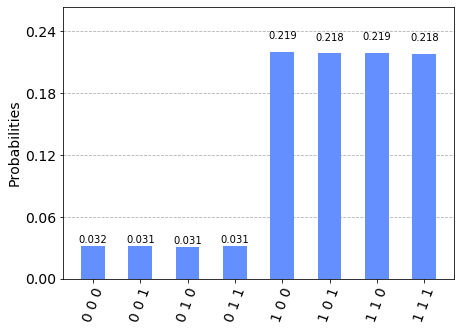

In [5]:
## Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend=simulator, shots=819200)
result = job.result()

## Plot a histogram of the results
counts = result.get_counts(circuit)
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

Interestingly, this bar graph is different from the previous one.  
Essentially, the difference comes due to the conditional application of X or ZX gates when respective classical bit(s) is(are) 1.  
If we start from the previous bar graph, the effect of the conditional application of X or ZX gates can be described as:  
decrease 010 and 110 bars to 1/32 size and increase 011 and 111 bars to 7/32 size arriving by this simple transformation to the current bar graph.  
Let's verify now that the state of q2 after the conditional application of Z or X gates is |𝜙> state.  


When Bob receives 00 classical bits, q2 is already in |𝜙> state (000 and 001 bars and we see if we try to find out whether q2 is in |0> or |1> state we need to multiply the bar heights by 4 to find respective probabilites: 4 x 1/32 = 1/8 and 4 x 7/32 = 7/8) so he does nothing.  

When Bob receives 10 classical bits, q2 is in 1/${\sqrt{8}}$|0>-${\sqrt{7/8}}$|1> state so he applies Z gate to q2 to get 1/${\sqrt{8}}$Z|0>-${\sqrt{7/8}}$Z|1>=1/${\sqrt{8}}$|0>+${\sqrt{7/8}}$|1>. The bars 100 and 101 for both bar graphs confirm these probabilities.  

When Bob receives 01 classical bits, q2 is in 1/${\sqrt{8}}$|1>+${\sqrt{7/8}}$|0> state so he applies X gate   
to q2 to get 1/${\sqrt{8}}$X|1>+${\sqrt{7/8}}$X|0>=1/${\sqrt{8}}$|0>+${\sqrt{7/8}}$|1>. The bars 010 and 011 for both bar graphs confirm these probabilities.  

Finally, when Bob receives 11 classical bits, q2 is in 1/${\sqrt{8}}$|1>-${\sqrt{7/8}}$|0> state so he applies both Z and X gate to get  
1/${\sqrt{8}}$ZX|1>-${\sqrt{7/8}}$ZX|0>=1/${\sqrt{8}}$Z|0>-${\sqrt{7/8}}$Z|1>=1/${\sqrt{8}}$|0>+${\sqrt{7/8}}$|1>. The bars 110 and 111 for both bar graphs confirm these probabilities.  
We see Bob is always able to generate an accurate replica of |𝜙>.

### What will happen when we apply H gates on q0 and q2 as well, in addition to q1?  <a name='q1'></a>
If we work out the math we can easily see that the state of 3 qubits before the measurements is 1/2(|000>+|001>+|011>+|010>) therefore there is 1/4 probability that 3 qubits will end in any of these 4 states after the measurements. Remarkably, the q0 qubit just before the measurements is always in state |0> which makes the conditional application of the Z gate obsolete. Now, there are only 2 possibilities for the classical bits: 00 and 01. For 00 case, nothing need to be done to get 1/${\sqrt{2}}$(|0>+|1>) state. For 01 case, after the application of the X gate to q2 we get again 1/${\sqrt{2}}$(X|1>+X|0>)= 1/${\sqrt{2}}$(|0>+|1>) state. So in both cases we were still able to restore the initial state of q0.  
Respective quantum circuit is displayed below with respective probabilities.

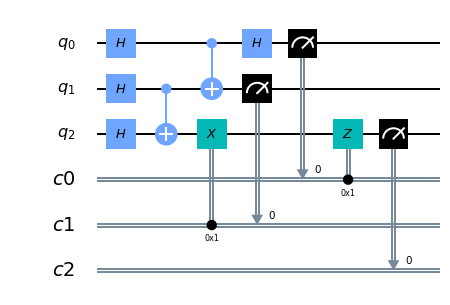

In [2]:
## We need 3 quantum registers
q = QuantumRegister(3, 'q')
## We need also 3 classical registers
c = [ClassicalRegister(1) for _ in range(3)]
## Define a 3-qubit quantum circuit
circuit = QuantumCircuit(q)
## Add classical registers to the circuit
for register in c:
    circuit.add_register(register)

## Apply the quantum gates
circuit.h(q[0])           #Hadammard on q[0] to get 1/sqrt(2)(|0>+|1>) state
circuit.h(q[1])           #Hadammard on q[1] to get 1/sqrt(2)(|0>+|1>) state
circuit.h(q[2])           #Hadammard on q[2] to get 1/sqrt(2)(|0>+|1>) state
circuit.cx(q[1], q[2])    #CNOT on q[1] and q[2]
circuit.cx(q[0], q[1])    #CNOT on q[0] and q[1]
circuit.h(q[0])           #Hadammard on q[0]

## Finish off with the measurements
circuit.measure(q[1], c[1])
## Apply X gate on q[2] depending on the value of the classical register c[1]
circuit.x(q[2]).c_if(c[1], 1)
circuit.measure(q[0], c[0])
## Apply Z gate on q[2] depending on the value of the classical register c[0]
circuit.z(q[2]).c_if(c[0], 1)
## measure q[2]
circuit.measure(q[2], c[2])

## Draw the circuit
%matplotlib inline
circuit.draw(output="mpl")

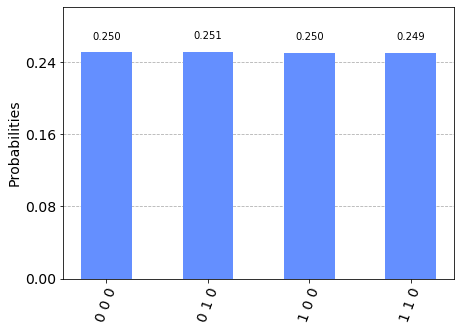

In [3]:
## Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend=simulator, shots=409600)
result = job.result()

## Plot a histogram of the results
counts = result.get_counts(circuit)
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

### What happens if we add a swap gate to the previous circuit between q0 and q1 after the last H gate and before the measurements? <a name='q2'></a>
As we saw in the previuos circuit the state of 3 qubits before the measurements and the swap gate is 1/2(|000>+|001>+|011>+|010>). After the swap gate between q0 and q1 the state of 3 qubits before the measurements is 1/2(|000>+|001>+|101>+|100>) and there is 1/4 probability that 3 qubits will end in any of these 4 states after the measurements. We see that q1 qubit is always in the state |0> before the measurements which makes the conditional application of the X gate obsolete. This is a direct consequence of the swap gate between q0 and q1.    
As in the previous circuit, there are only 2 possibilities for the classical bits: 00 and 10.  
For 00 case, as before, nothing need to be done to get 1/${\sqrt{2}}$(|0>+|1>) state.  
For 10 case, after the application of the Z gate to q2 we get 1/${\sqrt{2}}$(Z|1>+Z|0>)=1/${\sqrt{2}}$(|0>-|1>).  
This state is ortogonal to the the initial state of q0. Only in 00 case we were able to restore the initial state of q0.     
Respective quantum circuit is displayed below with respective probabilities.

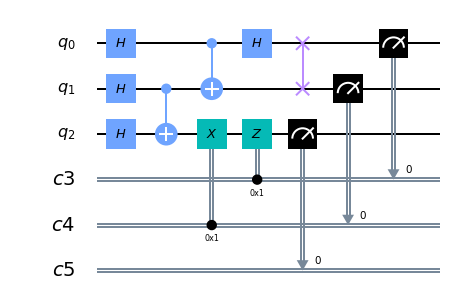

In [5]:
## We need 3 quantum registers
q = QuantumRegister(3, 'q')
## We need also 3 classical registers
c = [ClassicalRegister(1) for _ in range(3)]
## Define a 3-qubit quantum circuit
circuit = QuantumCircuit(q)
## Add classical registers to the circuit
for register in c:
    circuit.add_register(register)

## Apply the quantum gates
circuit.h(q[0])           #Hadammard on q[0] to get 1/sqrt(2)(|0>+|1>) state
circuit.h(q[1])           #Hadammard on q[1] to get 1/sqrt(2)(|0>+|1>) state
circuit.h(q[2])           #Hadammard on q[2] to get 1/sqrt(2)(|0>+|1>) state
circuit.cx(q[1], q[2])    #CNOT on q[1] and q[2]
circuit.cx(q[0], q[1])    #CNOT on q[0] and q[1]
circuit.h(q[0])           #Hadammard on q[0]
circuit.swap(q[0],q[1])   #swap gate between q[0] and q[1]

## Finish off with the measurements
circuit.measure(q[1], c[1])
## Apply X gate on q[2] depending on the value of the classical register c[1]
circuit.x(q[2]).c_if(c[1], 1)
circuit.measure(q[0], c[0])
## Apply Z gate on q[2] depending on the value of the classical register c[0]
circuit.z(q[2]).c_if(c[0], 1)
## measure q[2]
circuit.measure(q[2], c[2])

## Draw the circuit
%matplotlib inline
circuit.draw(output="mpl")

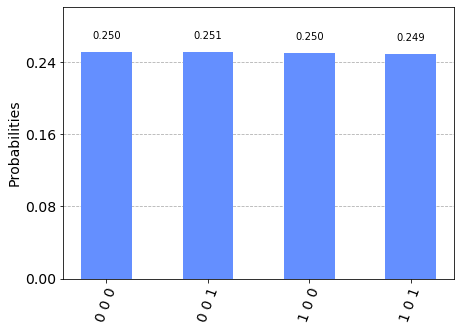

In [6]:
## Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend=simulator, shots=409600)
result = job.result()

## Plot a histogram of the results
counts = result.get_counts(circuit)
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)